In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as split
from sklearn import  linear_model as lr
from sklearn.metrics import mean_squared_error, r2_score
import pickle
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler as ss
from scipy import stats
import tensorflow as tf
import keras

Using TensorFlow backend.


In [4]:
import pandas as pd
df = pd.read_csv("Sales_prediction_Colombia.csv")

print('Working')

Working


In [5]:


df = pd.read_csv("Sales_prediction_Colombia.csv")
#data_top = df.head()
#data_top 
#print(df['area'])
df = df[['area', 'areabalcon', 'areaterraza',  'banos', 'estrato', 'garajes', 'habitaciones',  'halldealcobasoestar', 'jardin', 'tiempodeconstruido', 'valorventa']]
#'latitud','longitud', 

In [6]:
df = df.fillna(0) 
df = df.replace(to_replace = "Si",
                 value = 1)
df = df.replace(to_replace = "Entre 0 y 5 años",
                 value = 0)
df = df.replace(to_replace = "Entre 5 y 10 años",
                 value = 1)
df = df.replace(to_replace = "Entre 10 y 20 años",
                 value = 2)
df = df.replace(to_replace = "Más de 20 años",
                 value = 3)
print(df)

         area  areabalcon  areaterraza  banos  estrato  garajes  habitaciones  \
0       145.0       10.00        10.00    3.0      6.0      2.0           3.0   
1       114.0        0.00         0.00    3.0      4.0      0.0           3.0   
2       170.0       30.00        30.00    4.0      6.0      3.0           2.0   
3        61.0        0.00         0.00    1.0      6.0      1.0           1.0   
4       120.5        0.00         0.00    3.0      0.0      2.0           2.0   
...       ...         ...          ...    ...      ...      ...           ...   
145547  118.0        0.00         0.00    3.0      5.0      1.0           3.0   
145548   89.0       10.00        10.00    3.0      3.0      1.0           3.0   
145549   88.0        0.00         0.00    3.0      6.0      2.0           2.0   
145550  173.0       25.68        25.68    3.0      6.0      3.0           2.0   
145551  106.0        0.00         0.00    2.0      3.0      1.0           3.0   

        halldealcobasoestar

In [7]:
df.isnull().values.any()

False

In [8]:
x = df.drop(['valorventa'], axis = 1).values
y = df['valorventa'].values

In [9]:
df.head()

,area,areabalcon,areaterraza,banos,estrato,garajes,habitaciones,halldealcobasoestar,jardin,tiempodeconstruido,valorventa
0,145.0,10.0,10.0,3.0,6.0,2.0,3.0,0,0,1,9.000000e+08
1,114.0,0.0,0.0,3.0,4.0,0.0,3.0,0,0,0,5.481475e+08
2,170.0,30.0,30.0,4.0,6.0,3.0,2.0,1,0,1,1.500000e+09
3,61.0,0.0,0.0,1.0,6.0,1.0,1.0,1,0,0,4.950000e+08
4,120.5,0.0,0.0,3.0,0.0,2.0,2.0,0,0,3,8.500000e+08


In [10]:
df=df.dropna()
df_log=df.copy()
df_log["log_area"]=np.log(df_log['area']+1)
df_log["log_area_bal"]=np.log(df_log['areabalcon']+1)
df_log["log_valor"]=np.log(df_log['valorventa']+1)

In [11]:
Q1 = df_log.log_valor.quantile(0.25)
Q3 = df_log.log_valor.quantile(0.75)
IQR = Q3 - Q1
lower=Q1 - 1.5 * IQR
upper=Q3 + 1.5 * IQR
df_log = df_log[(df_log.log_valor <upper)|(df_log.log_valor<lower)]

In [12]:
df_log["log_area"]=np.log(df_log['area']+1)

In [13]:
#df_log["log_latitud"]=np.log(df_log['latitud']+1)
#df_log["log_longitud"]=np.log(abs(df_log['longitud']+1))

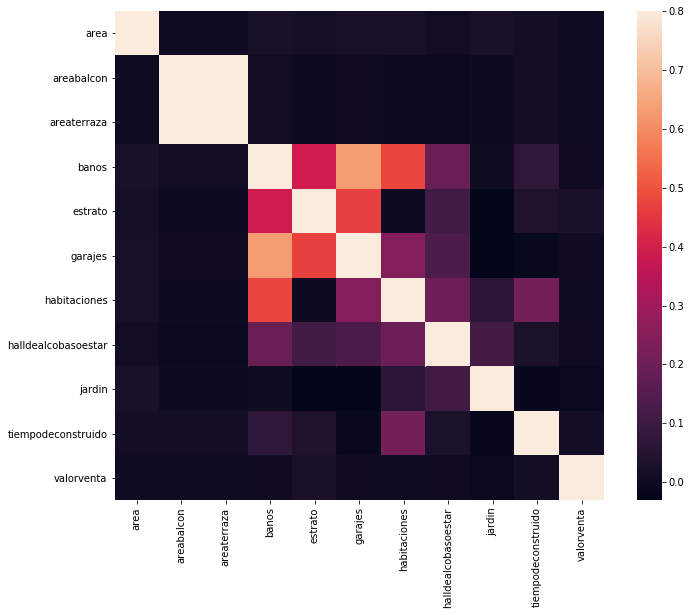

In [14]:
import seaborn as sns

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [15]:
k = 10
cols = corrmat.nlargest(k, 'valorventa')['valorventa'].index
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,valorventa
1,estrato
2,tiempodeconstruido
3,halldealcobasoestar
4,garajes
5,banos
6,area
7,habitaciones
8,areabalcon
9,areaterraza


Text(0.5, 1, 'log_valor vs. log_area')

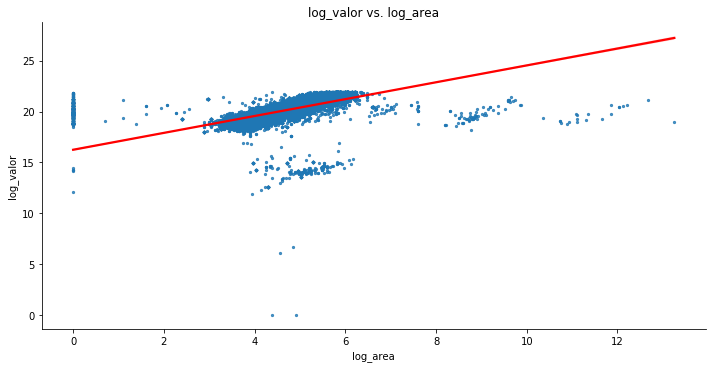

In [16]:
sns.lmplot(x='log_area',y='log_valor',data = df_log, 
           line_kws = {'color': "red"} ,aspect= 2, scatter_kws={"s": 5})
plt.title("log_valor vs. log_area")

In [17]:
df_log_clean = df_log.drop(["valorventa","area", "areabalcon" ], axis=1)

In [18]:
x=df_log_clean.drop("log_valor", axis=1)
y=df_log_clean[["log_valor"]]

In [19]:
print(x)

        areaterraza  banos  estrato  garajes  habitaciones  \
0             10.00    3.0      6.0      2.0           3.0   
1              0.00    3.0      4.0      0.0           3.0   
2             30.00    4.0      6.0      3.0           2.0   
3              0.00    1.0      6.0      1.0           1.0   
4              0.00    3.0      0.0      2.0           2.0   
...             ...    ...      ...      ...           ...   
145547         0.00    3.0      5.0      1.0           3.0   
145548        10.00    3.0      3.0      1.0           3.0   
145549         0.00    3.0      6.0      2.0           2.0   
145550        25.68    3.0      6.0      3.0           2.0   
145551         0.00    2.0      3.0      1.0           3.0   

        halldealcobasoestar  jardin  tiempodeconstruido  log_area  \
0                         0       0                   1  4.983607   
1                         0       0                   0  4.744932   
2                         1       0             

0         4.983607
1         4.744932
2         5.141664
3         4.127134
4         4.799914
            ...   
145547    4.779123
145548    4.499810
145549    4.488636
145550    5.159055
145551    4.672829
Name: log_area, Length: 143984, dtype: float64
0         20.617905
1         20.122055
2         21.128731
3         20.020068
4         20.560747
            ...    
145547    20.500122
145548    19.583832
145549    20.671973
145550    21.094829
145551    19.924758
Name: log_valor, Length: 143984, dtype: float64


[]

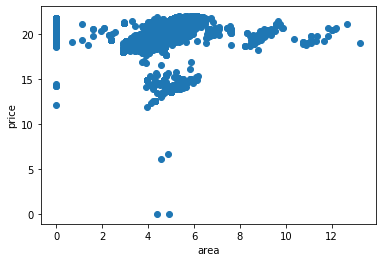

In [20]:
X1 = x['log_area']
Y1 = y['log_valor']
print(X1)
print(Y1)
plt.scatter(X1, Y1)
plt.xlabel('area')
plt.ylabel('price')
plt.plot()

0         6.0
1         4.0
2         6.0
3         6.0
4         0.0
         ... 
145547    5.0
145548    3.0
145549    6.0
145550    6.0
145551    3.0
Name: estrato, Length: 143984, dtype: float64
0         20.617905
1         20.122055
2         21.128731
3         20.020068
4         20.560747
            ...    
145547    20.500122
145548    19.583832
145549    20.671973
145550    21.094829
145551    19.924758
Name: log_valor, Length: 143984, dtype: float64


[]

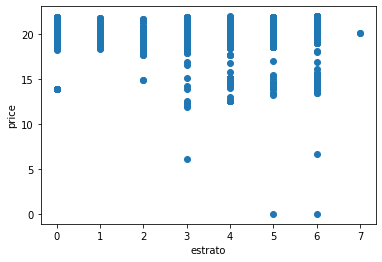

In [21]:
X1 = x['estrato']
Y1 = y['log_valor']
print(X1)
print(Y1)
plt.scatter(X1, Y1)
plt.xlabel('estrato')
plt.ylabel('price')
plt.plot()

In [22]:
##########################
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x) 
x = scaler.transform(x) 

scaler_x = ss()
scaler_y = ss()
scaler_y.fit(y.values)
scaler_x.fit(x)
y_s = scaler_y.transform(y)
x_s = scaler_x.transform(x)
#################

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x_s,y_s, test_size=0.2, random_state=72)

In [24]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

reg = linear_model.LinearRegression()

In [25]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
reg.score(x_test, y_test)

0.6573884930557632

In [27]:
rid= lr.Ridge(alpha=0.9)
rid.fit(x_train,y_train)
y_pred=rid.predict(x_test)
print("Ridge")
print("MSE ",mean_squared_error(y_test, y_pred))
print("R2 SCORE ",r2_score(y_test, y_pred))

Ridge
MSE  0.3304525427555845
R2 SCORE  0.6573885365944028


In [28]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state = 10)

In [29]:
tree.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')

In [30]:
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

Accuracy on training set: 0.938
Accuracy on test set: 0.839


In [31]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

print("R^2: {}".format(metrics.r2_score(y_test, tree.predict(x_test)) ))

R^2: 0.8394084832956168


In [32]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)
print("Random_Forest")
print("mean_squared_error ",mean_squared_error(y_test, y_pred))
print("r2 score ",r2_score(y_test, y_pred))

c:\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random_Forest
mean_squared_error  0.12327959179953721
r2 score  0.8721843657117075


In [33]:
from sklearn import metrics

models = []
models.append(('LinearRegression', reg))
models.append(('Ridge', rid))
models.append(('DecisionTree', tree))
models.append(('RandomForest', rf))
#models.append(('Neural_Network1', model))

r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model1 in models:
    print(name)
    print("R^2: {}".format(metrics.r2_score(y_test, model1.predict(x_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model1.predict(x_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model1.predict(x_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model1.predict(x_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model1.predict(x_test)) ))
    r2.append(metrics.r2_score(y_test, model1.predict(x_test)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, model1.predict(x_test)))
    median_absolute_error.append( metrics.median_absolute_error(y_test, model1.predict(x_test)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, model1.predict(x_test)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, model1.predict(x_test)))

LinearRegression
R^2: 0.6573884930557631
Explained variance score: 0.6574005171929322
Median absolute error: 0.2327550015237514
Mean squared error: 0.33045258474908357
Mean absolute errors: 0.3157583026809767
Ridge
R^2: 0.6573885365944028
Explained variance score: 0.6574005606296552
Median absolute error: 0.23275735242801454
Mean squared error: 0.3304525427555845
Mean absolute errors: 0.31575876597818053
DecisionTree
R^2: 0.8394084832956168
Explained variance score: 0.8394092631490315
Median absolute error: 0.03374315767300716
Mean squared error: 0.1548922926058532
Mean absolute errors: 0.13250581339320416
RandomForest
R^2: 0.8721843657117075
Explained variance score: 0.8721869003614967
Median absolute error: 0.0456822703757424
Mean squared error: 0.12327959179953721
Mean absolute errors: 0.12671941788667412


In [34]:
import pandas as pd
d = {'r2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }
df = pd.DataFrame(data=d)
#df.insert(loc=0, column='Method', value=['LinearRegression', 'ElasticNet', 'Lasso', 'Ridge', 'DecisionTree'])#,'Lasso','Ridge','LR'])
df.insert(loc=0, column='Method', value=['LinearRegression', 'Ridge', 'DecisionTree', 'RandomForest'])#,'Lasso','Ridge','LR'])
#df.insert(loc=1, column='Method', value=['LinearRegression'])
df

,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
0,LinearRegression,0.657388,0.657401,0.232755,0.330453,0.315758
1,Ridge,0.657389,0.657401,0.232757,0.330453,0.315759
2,DecisionTree,0.839408,0.839409,0.033743,0.154892,0.132506
3,RandomForest,0.872184,0.872187,0.045682,0.123280,0.126719


In [35]:
##########################
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler().fit(x) 
#x = scaler.transform(x) 

#scaler_x = ss()
#scaler_y = ss()
#scaler_y.fit(y.values)
#scaler_x.fit(x)
#y_s = scaler_y.transform(y)
#x_s = scaler_x.transform(x)
#################

In [36]:
xn_train, xn_test, yn_train, yn_test= split(x,y, test_size=0.2, random_state=72)

In [37]:
#import keras.backend as K
#def r2_keras(y_true, y_pred):
#    SS_res =  K.sum(K.square(y_true - y_pred)) 
#    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
#    return ( 1 - SS_res/(SS_tot + K.epsilon()) )
print(xn_train)

[[-0.02338328 -0.55639927 -1.02576877 ... -0.27818353 -1.2160559
  -0.39011393]
 [-0.02338328 -0.55639927 -0.35847428 ... -1.24201581 -1.14649651
  -0.39011393]
 [-0.02338328 -1.53403784 -0.35847428 ... -1.24201581 -0.98454243
  -0.39011393]
 ...
 [-0.01583204 -1.53403784 -1.02576877 ...  1.64948102 -0.50666383
   0.79668284]
 [-0.02338328 -0.55639927  0.3088202  ...  0.68564874 -0.35298301
  -0.39011393]
 [-0.02338328 -1.53403784 -0.35847428 ...  0.68564874 -0.72819925
  -0.39011393]]


In [38]:
model = Sequential()
model.add(Dense(128, input_dim = x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])
  
history = model.fit(xn_train,yn_train,epochs=10, batch_size=32,validation_data=[xn_test, yn_test])


Train on 115187 samples, validate on 28797 samples
Epoch 1/10
115187/115187 [==============================] - 7s 57us/step - loss: 3.4883 - mean_squared_error: 17.1840 - val_loss: 0.1948 - val_mean_squared_error: 3.1314
Epoch 2/10
115187/115187 [==============================] - 7s 65us/step - loss: 0.2331 - mean_squared_error: 2.1399 - val_loss: 0.2174 - val_mean_squared_error: 1.6003
Epoch 3/10
115187/115187 [==============================] - 8s 74us/step - loss: 0.2266 - mean_squared_error: 1.3245 - val_loss: 0.2016 - val_mean_squared_error: 1.1244
Epoch 4/10
115187/115187 [==============================] - 8s 74us/step - loss: 0.2046 - mean_squared_error: 0.9926 - val_loss: 0.2725 - val_mean_squared_error: 0.8890
Epoch 5/10
115187/115187 [==============================] - 8s 72us/step - loss: 0.2049 - mean_squared_error: 0.8152 - val_loss: 0.1645 - val_mean_squared_error: 0.7510
Epoch 6/10
115187/115187 [==============================] - 9s 75us/step - loss: 0.1997 - mean_squared_

In [39]:
#model2 = Sequential()
#model2.add(Dense(128, input_dim = x.shape[1], kernel_initializer='normal', activation='relu'))
#model2.add(Dense(256, kernel_initializer='normal', activation='relu'))
#model2.add(Dense(256, kernel_initializer='normal', activation='relu'))
#model2.add(Dense(1, kernel_initializer='normal', activation='linear'))

#model2.compile(loss='mean_squared_error', optimizer=adam, metrics=[tf.keras.metrics.MeanSquaredError()])
  
history = model.fit(xn_train,yn_train,epochs=30, batch_size=32,validation_data=[xn_test, yn_test])


Train on 115187 samples, validate on 28797 samples
Epoch 1/30
115187/115187 [==============================] - 7s 58us/step - loss: 0.1817 - mean_squared_error: 0.4535 - val_loss: 0.1645 - val_mean_squared_error: 0.4405
Epoch 2/30
115187/115187 [==============================] - 8s 68us/step - loss: 0.1765 - mean_squared_error: 0.4289 - val_loss: 0.2073 - val_mean_squared_error: 0.4184
Epoch 3/30
115187/115187 [==============================] - 8s 73us/step - loss: 0.1784 - mean_squared_error: 0.4093 - val_loss: 0.1849 - val_mean_squared_error: 0.4001
Epoch 4/30
115187/115187 [==============================] - 8s 69us/step - loss: 0.1749 - mean_squared_error: 0.3918 - val_loss: 0.1737 - val_mean_squared_error: 0.3839
Epoch 5/30
115187/115187 [==============================] - 8s 70us/step - loss: 0.1745 - mean_squared_error: 0.3768 - val_loss: 0.1437 - val_mean_squared_error: 0.3697
Epoch 6/30
115187/115187 [==============================] - 8s 72us/step - loss: 0.1763 - mean_squared_e

In [40]:
mse_test = model.evaluate(xn_train, yn_train)

115187/115187 [==============================] - 2s 14us/step


In [41]:
y_pred = model.predict(xn_train)

print("R2 SCORE ",r2_score(yn_train, y_pred))

R2 SCORE  0.7230515636568977


In [42]:
print(mse_test)

[0.15971623752413808, 0.2333981990814209]


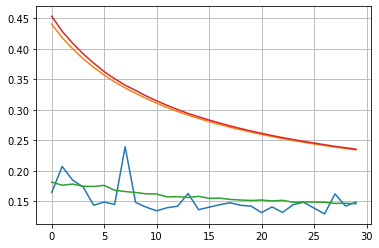

In [45]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

In [46]:
print('neural network')
print("R^2: {}".format(metrics.r2_score(yn_test, model.predict(xn_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(yn_test, model.predict(xn_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(yn_test, model.predict(xn_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(yn_test, model.predict(xn_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(yn_test, model.predict(xn_test)) ))

neural network
R^2: 0.7298974829207214
Explained variance score: 0.7587777760541092
Median absolute error: 0.16144388858801406
Mean squared error: 0.14891919113914376
Mean absolute errors: 0.2060002087040631
